In [1]:
import time
import pandas as pd
import numpy as np
import util
import pyBigWig
import seaborn as sns
import glob
from matplotlib_venn import venn2,venn3
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tic=time.time()

In [2]:
h=pd.read_csv('data/h.csv',index_col=0)
h.shape

(39517, 8)

In [67]:
for n in ['y','o']:
    path='data/meth/t/'+n+'.bw'
    bw=pyBigWig.open(path)
    h['t'+n]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
h['td']=h['to']-h['ty']

In [4]:
h.loc[h.prc>=100,'prg']='High'
h.loc[(h.prc>=10)&(h.prc<100),'prg']='Moderate'
h.loc[(h.prc>=1)&(h.prc<10),'prg']='Low'
h.loc[(h.prc<1),'prg']='Minimal'

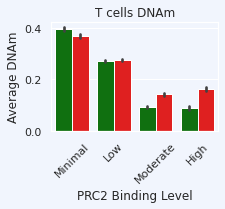

In [96]:
pl=h[['prg','ty','to']].melt('prg')
pl.columns=['prg','T cell','value']
pl['T cell']=pl['T cell'].replace({'ty':'Young','to':'Old'})
sns.set(rc={'axes.facecolor':'#f1f5fd','figure.facecolor':'#f1f5fd','figure.figsize':(3,2)})
ax=sns.barplot(data=pl,x='prg',y='value',hue='T cell',palette=["green", "red"],
               order=['Minimal','Low','Moderate','High']);
ax.legend_.remove()
ax.set(xlabel='PRC2 Binding Level', ylabel='Average DNAm',title='T cells DNAm');
plt.xticks(rotation=45);

In [7]:
print(len(h[h.prg=='High']),len(h[h.prg=='High'][h.td>0]))

1103 1039


In [92]:
h.loc[h.d>=3500,'dg']='3.5K>'
h.loc[(h.d>=1000)&(h.d<3500),'dg']='1-3.5K'
h.loc[(h.d>=100)&(h.d<1000),'dg']='100-1K'
h.loc[(h.d<100),'dg']='<100'

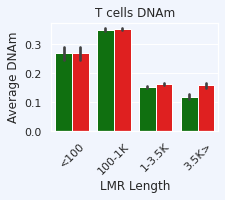

In [95]:
pl=h[['dg','ty','to']].melt('dg')
pl.columns=['dg','T cell','value']
pl['T cell']=pl['T cell'].replace({'ty':'Young','to':'Old'})
sns.set(rc={'axes.facecolor':'#f1f5fd','figure.facecolor':'#f1f5fd','figure.figsize':(3,2)})
ax=sns.barplot(data=pl,x='dg',y='value',hue='T cell',palette=["green", "red"],
               order=['<100','100-1K','1-3.5K','3.5K>']);
ax.legend_.remove()
ax.set(xlabel='LMR Length', ylabel='Average DNAm',title='T cells DNAm');
plt.xticks(rotation=45);

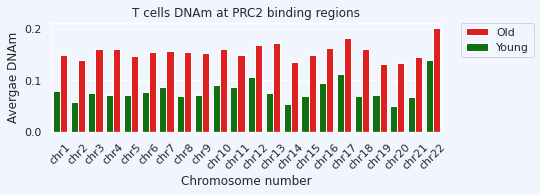

In [97]:
pl=h[h.prc>100][h.d>3500].groupby('ch')[['ty','to']].mean()
pl.columns=['Young','Old']
pl['chr']=pl.index
pl['chn']=pl.chr.str[3:].astype(int)
pl=pl.sort_values('chn').drop('chn',axis=1)
pl=pl.melt(id_vars='chr')
sns.set(rc={'axes.facecolor':'#f1f5fd','figure.facecolor':'#f1f5fd','figure.figsize':(7,2)})
ax=sns.barplot(data=pl,x='chr',y='value',hue='variable',palette=["green", "red"]);
labels=['Newborn',
        'Centenarian']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_xlabel('Chromosome number')#,fontsize=10);
ax.set_ylabel('Avergae DNAm')#,fontsize=10);
ax.set_title('T cells DNAm at PRC2 binding regions');#,fontsize=12);
plt.xticks(rotation=45);

In [4]:
sp=['SRR10429'+ i for i in  ['03','06','07','09','11','13']]
se=['SRR10429'+ i for i in  ['04','05','08','10','12','14']]
sep=sp+se
for sn in se:#p:
    print(sn,end=',')
    path='data/meth/s/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)

In [10]:
sy=['SRR10429'+ i for i in  ['04','05','08']]
so=['SRR10429'+ i for i in  ['10','12','14']]
h['sy']=h[sy].mean(1)
h['so']=h[so].mean(1)
h['sd']=h['so']-h['sy']

In [ ]:
pl=h[['prg','sy','so']].melt('prg')
pl.columns=['prg','epidermis','value']
pl['epidermis']=pl['epidermis'].replace({'sy':'Young','so':'Old'})
sns.set(rc={'axes.facecolor':'#f1f5fd','figure.facecolor':'#f1f5fd','figure.figsize':(3,2)})
ax=sns.barplot(data=pl,x='prg',y='value',hue='epidermis',palette=["green", "red"],
               order=['Minimal','Low','Moderate','High']);
ax.legend_.remove()
ax.set(xlabel='PRC2 Binding Level', ylabel='Average DNAm',title='Epidermis DNAm');
plt.xticks(rotation=45);

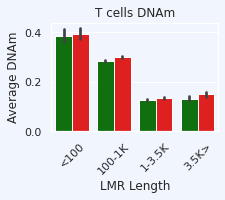

In [99]:
pl=h[['dg','sy','so']].melt('dg')
pl.columns=['dg','epidermis','value']
pl['epidermis']=pl['epidermis'].replace({'ty':'Young','to':'Old'})
sns.set(rc={'axes.facecolor':'#f1f5fd','figure.facecolor':'#f1f5fd','figure.figsize':(3,2)})
ax=sns.barplot(data=pl,x='dg',y='value',hue='epidermis',palette=["green", "red"],
               order=['<100','100-1K','1-3.5K','3.5K>']);
ax.legend_.remove()
ax.set(xlabel='LMR Length', ylabel='Average DNAm',title='T cells DNAm');
plt.xticks(rotation=45);

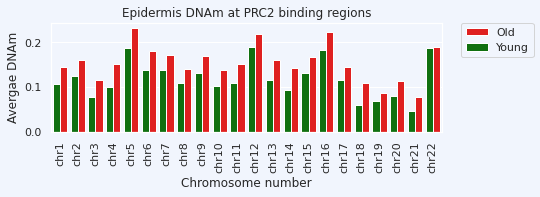

In [105]:
pl=h[h.prc>100][h.d>3500].groupby('ch')[['sy','so']].mean()
pl.columns=['Young','Old']
pl['chr']=pl.index
pl['chn']=pl.chr.str[3:].astype(int)
pl=pl.sort_values('chn').drop('chn',axis=1)
pl=pl.melt(id_vars='chr')
sns.set(rc={'axes.facecolor':'#f1f5fd','figure.facecolor':'#f1f5fd','figure.figsize':(7,2)})
ax=sns.barplot(data=pl,x='chr',y='value',hue='variable',palette=["green", "red"]);
labels=['Newborn',
        'Centenarian']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.set_xlabel('Chromosome number')#,fontsize=10);
ax.set_ylabel('Avergae DNAm')#,fontsize=10);
ax.set_title('Epidermis DNAm at PRC2 binding regions');#,fontsize=12);
plt.xticks(rotation=90);

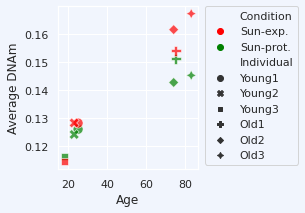

In [113]:
hz=h[h.prg=='High'][h.d>3500]
p=pd.DataFrame(hz[sep].mean())
p['age']=[25,23,18,75,74,83]+[25,23,18,75,74,83]
p['g']= ['Sun-prot.']*6+['Sun-exp.']*6
p['indivudal']=2*['Young1','Young2','Young3','Old1','Old2','Old3']
p.columns=['Average DNAm','Age','Condition','Individual']
fig, ax = plt.subplots(figsize=(2.5,3))
sns.scatterplot(data=p,x='Age',y='Average DNAm',hue='Condition',hue_order=['Sun-exp.','Sun-prot.'],
                palette=['red','green'],markers=True, style='Individual',s=100,alpha=.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [115]:
fyo=['Young-381','Young-400','Young-498','Old-247','Old-602','Old-725']
for sn in fyo:
    print(sn,end=',')
    path='data/meth/f/yo/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)

[Text(0, 0.5, 'Average DNAm')]

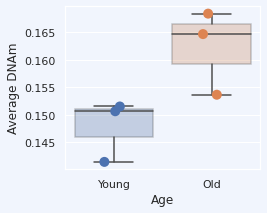

In [116]:
hz=h[h.prg=='High'][h.d>3500]
p=pd.DataFrame(hz[fyo].mean())
p['Age']=3*['Young']+3*['Old']
fig, ax = plt.subplots(figsize=(3.5,3))
ax=sns.boxplot(data=p,x='Age',y=0,boxprops=dict(alpha=.3))
ax=sns.stripplot(data=p,x='Age',y=0,marker=".",size=20)
ax.set( ylabel='Average DNAm')

In [118]:
fs=['SRR3264'+str(i) for i in [413,414,415,416,722]]
for sn in fs:
    print(sn,end=',')
    path='data/meth/f/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)

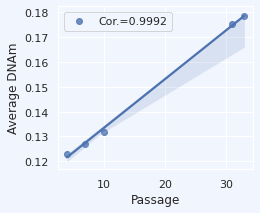

In [120]:
hz=h[h.prg=='High'][h.d>3500]
p=pd.DataFrame(hz[fs].mean())
p['Passage']=[4,7,10,31,33]
p.columns=['Average DNAm','Passage']#,'Condition','Individual']
fig, ax = plt.subplots(figsize=(3.5,3))
ax=sns.regplot(data=p,x='Passage',y='Average DNAm',label='Cor.='+str(p.corr().values[0,1].round(4)))
ax.legend(loc="best")    

In [96]:
al=[]
for n in ['110720-39','110717-46','110722-72','110714-79']:
    path='data/meth/t/g/'+n+'.bw'
    bw=pyBigWig.open(path)
    h['t'+n]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
    al.append(bw.stats('chr1',0,-1,'mean',exact=True))

In [98]:
print(al)

[[0.7395995861997746], [0.727615413784165], [0.6802138534246664], [0.7011212313548753]]


In [86]:
t=h.sort_values('prc').dropna().copy()
t=t[t['prc']>0].copy()
len(t)

39515

<AxesSubplot:>

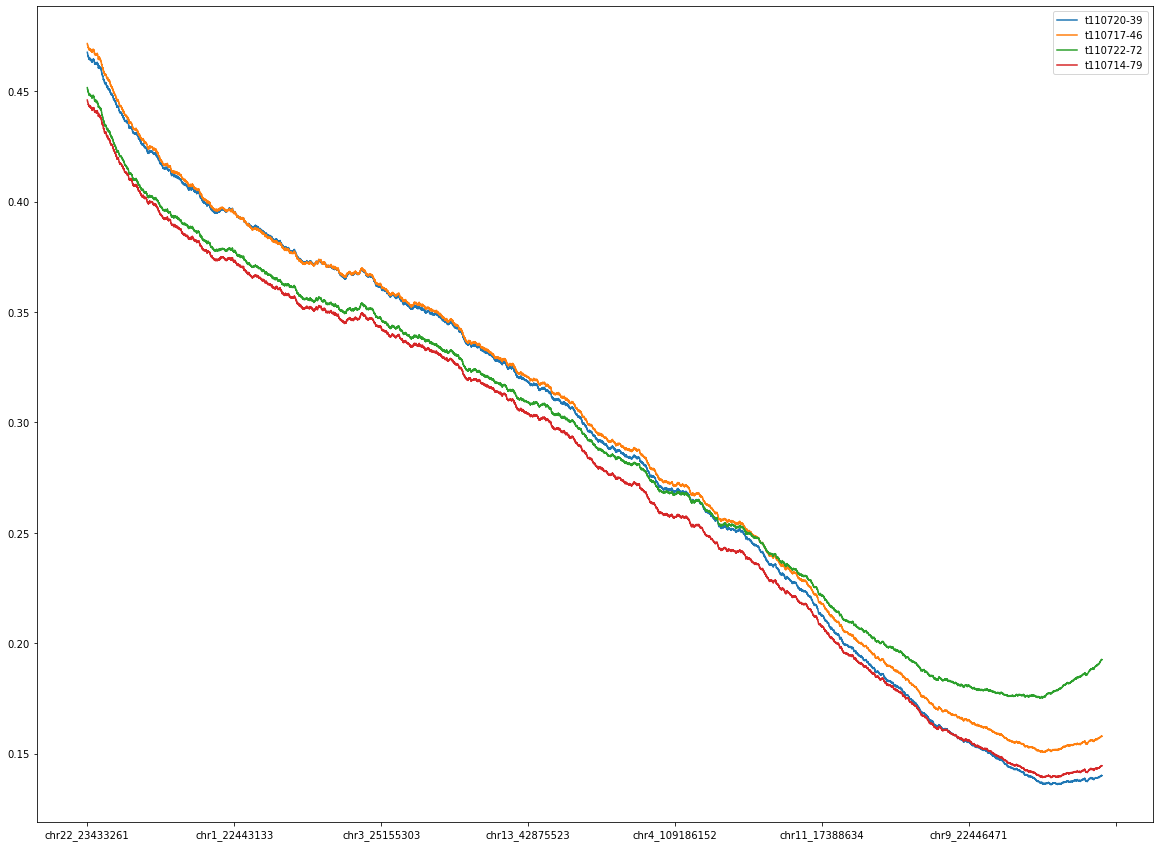

In [87]:
t[['t110720-39','t110717-46','t110722-72','t110714-79']].rolling(5000).mean().plot(figsize=(20,15))

In [101]:
t['t110714-79'].mean()

0.2806036428682418